In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import plot_boundary
from kernel_SVM_functions import rbf_kernel
from classifiers import SoftMarginKernelClassifier, QUBOSoftMarginClassifier


In [2]:
filename = 'setosa-versicolor'

data = pd.read_csv(f'iris_data/{filename}.csv').to_numpy()

X = data[:, 1: -1]
t = data[:, -1]
#iris_setosa will be 1, iris-versicolor will be -1
t[t == 'Iris-setosa'] = 1
t[t == 'Iris-versicolor'] = -1
t = t.astype('float')

X_train, X_test, t_train, t_test = train_test_split(X, t, train_size = 0.4, shuffle = True, stratify = t)
t_train = t_train.reshape(-1, 1)
t_test = t_test.reshape(-1, 1)

In [5]:
#Showing the decision boundary between petal length and petal width -- which divides the data really well. 
dimensions = [2, 3]
clf = QUBOSoftMarginClassifier(2, 3, 5, rbf_kernel, 1)
clf = clf.make_QUBO_problem(X_train, t_train).fit(X_train, t_train)
scores = clf.decision_function(X_test)
preds = clf.predict(X_test)
q_prob_dist = clf.predict_proba(X_test)

clf.support_vectors = clf.support_vectors[:, dimensions]
clf.alphas = clf.alphas[dimensions]
plot_X_test = X_test[:, dimensions]
plot_t_test = t_test

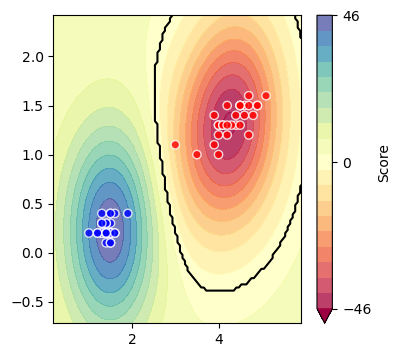

In [8]:
plot_boundary.plot(plot_X_test, plot_t_test, clf, contour_func = 'decision_function', colorbar = True)